In [1]:
pwd

'/Users/MariaLoizou'

In [2]:
# Import libraries 

In [3]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [4]:
#Assignment - Part A
#Exercise 1

In [5]:
#Part A - Load the data into Python 
marketing_data = pd.read_csv('/Users/MariaLoizou/Desktop/MSc BIDA/4.Data Mining, Visualisation and Decision Making/Examples and Data/Datasets/bank_marketing_data.csv', index_col = 0)

In [6]:
 #Part B - Perform an initial examination of the data and write your comments.

In [7]:
marketing_data.sample(n = 30)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20080,35.0,unemployed,single,university.degree,no,no,no,cellular,aug,mon,2.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
36579,35.0,admin.,married,university.degree,no,no,no,cellular,jun,thu,3.0,999.0,0.0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,yes
40803,31.0,technician,married,university.degree,no,no,no,cellular,sep,thu,1.0,3.0,1.0,success,-1.1,94.199,-37.5,0.878,4963.6,yes
7988,37.0,entrepreneur,married,basic.9y,no,yes,no,telephone,jun,mon,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
13119,37.0,management,single,university.degree,no,yes,no,cellular,jul,wed,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
27424,56.0,management,married,basic.9y,no,yes,no,telephone,nov,fri,7.0,999.0,0.0,NaN,-0.1,93.200,-42.0,4.021,5195.8,no
19705,56.0,admin.,married,university.degree,no,no,yes,cellular,aug,thu,3.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
25656,31.0,admin.,single,high.school,no,yes,no,cellular,nov,wed,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
1262,49.0,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,thu,1.0,999.0,0.0,nonexistent,1.1,93.994,NaN,4.855,5191.0,no
41145,26.0,admin.,single,university.degree,no,no,no,cellular,nov,fri,3.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.040,4963.6,yes


In [8]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9280 entries, 34579 to 16807
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9261 non-null   float64
 1   job             9280 non-null   object 
 2   marital         9280 non-null   object 
 3   education       9253 non-null   object 
 4   default         9248 non-null   object 
 5   housing         9259 non-null   object 
 6   loan            9258 non-null   object 
 7   contact         9280 non-null   object 
 8   month           9280 non-null   object 
 9   day_of_week     9280 non-null   object 
 10  campaign        9250 non-null   float64
 11  pdays           9260 non-null   float64
 12  previous        9252 non-null   float64
 13  poutcome        9264 non-null   object 
 14  emp.var.rate    9250 non-null   float64
 15  cons.price.idx  9260 non-null   float64
 16  cons.conf.idx   9256 non-null   float64
 17  euribor3m       9255 non-nul

In [9]:
#View a Descriptive Statistic Summary

In [10]:
marketing_data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,9261.000000,9250.000000,9260.000000,9252.000000,9250.000000,9260.000000,9256.000000,9255.000000,9261.000000
mean,40.464421,2.321514,888.323002,0.317013,-0.493038,93.482013,-40.184389,2.968689,5135.528215
std,11.969497,2.296910,312.529933,0.700171,1.723534,0.634667,5.359439,1.890814,87.031409
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<AxesSubplot:>

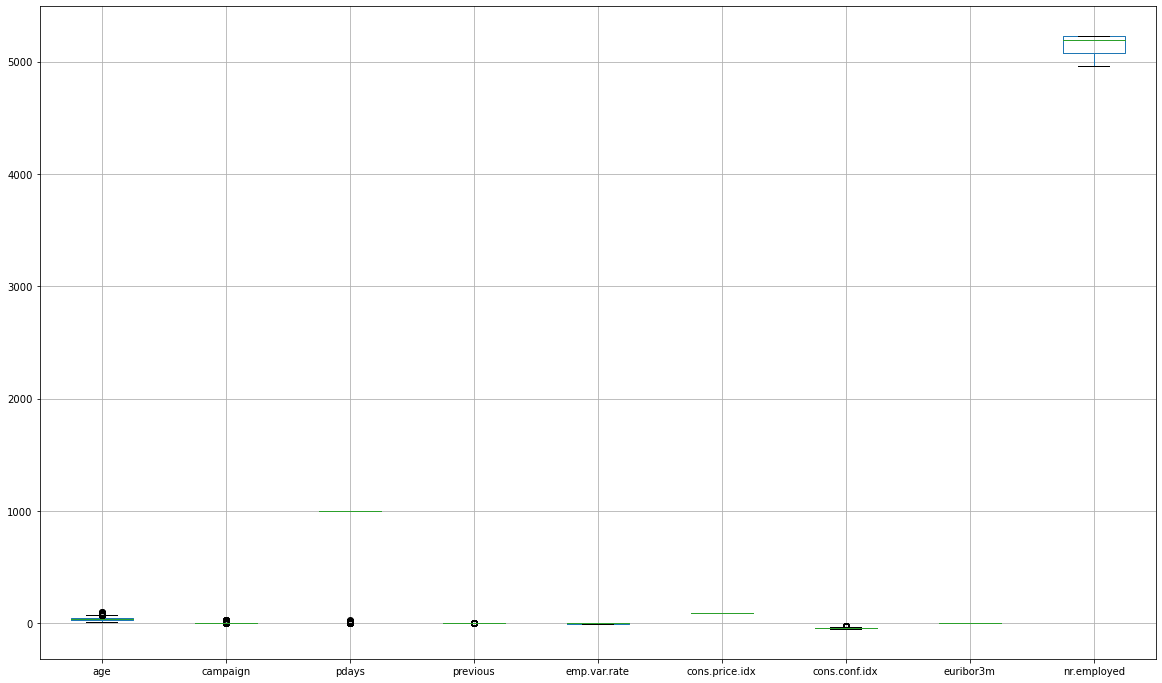

In [11]:
marketing_data.boxplot(figsize = (20,12))

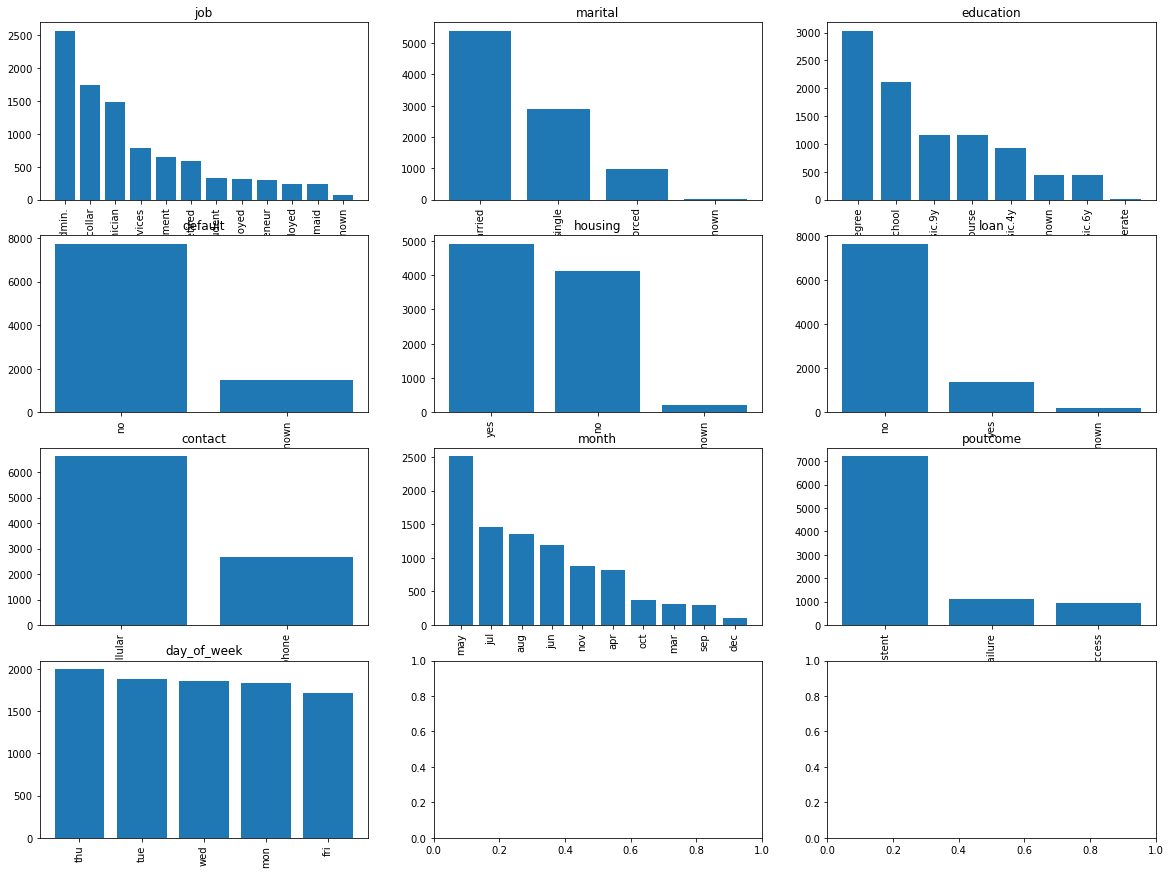

In [12]:
#Visualise the categorical features 
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome', 'day_of_week' ]

fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = marketing_data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

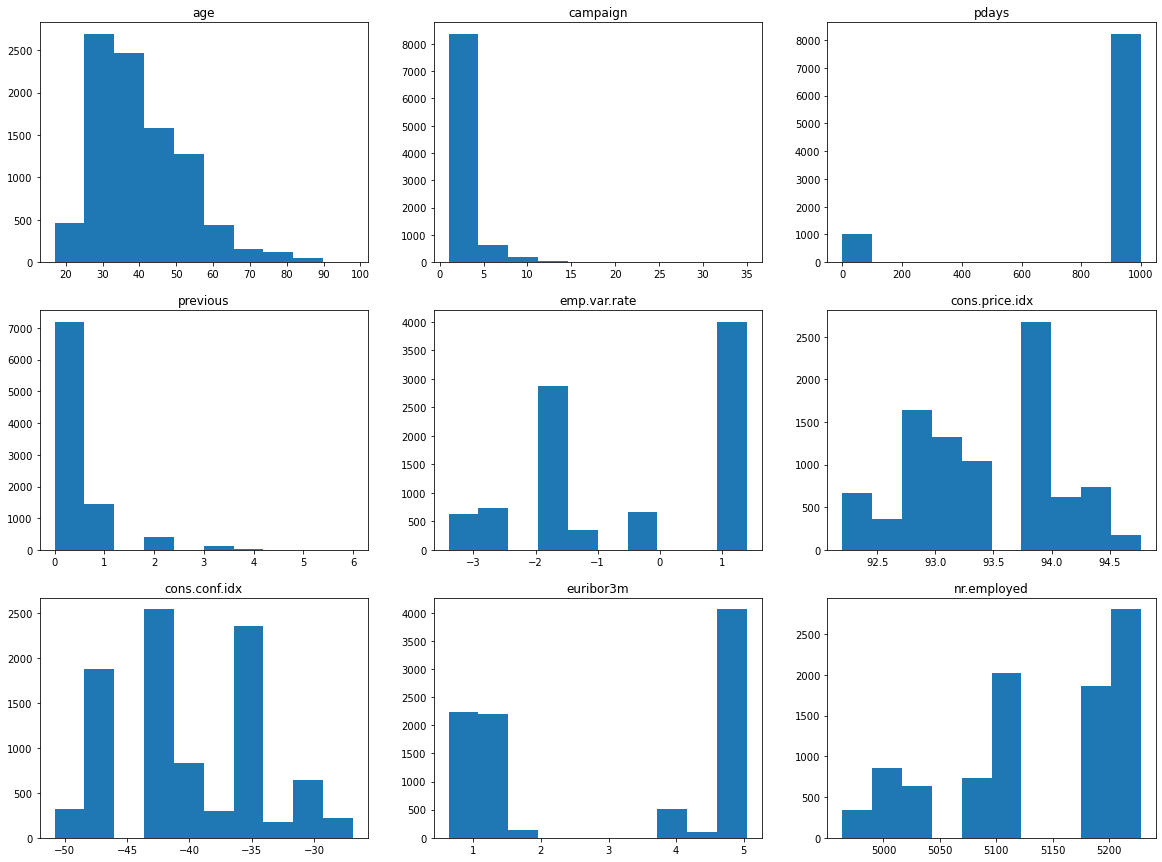

In [13]:
#Visualise the numeric features 
num_columns = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(marketing_data[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

<AxesSubplot:title={'center':'signed-up for a term deposit'}>

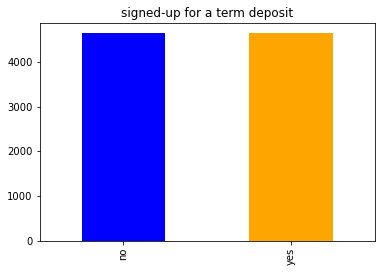

In [14]:
#Visualise the campaign outcome 
value_counts = marketing_data['y'].value_counts()
value_counts.plot.bar(color=['blue', 'orange'], title = 'signed-up for a term deposit')

In [15]:
#Since the distribution of the outcome is almost equal between yes and no, accuracy 
#can be used as a metric for the model. In addition, following inspection of the data we can see that there are missing 
#data and outliers for most features which need to be treated. 

In [16]:
#Part C - Check for and treat missing values. Before you start, plot the distribution of missing
#values over the dataset’s features

In [17]:
# Which entries are null? Check for missing values 

In [18]:
marketing_data.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
34579,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
446,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20173,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18171,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30128,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28870,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30452,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28937,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16739,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
# Rows with null values 

In [20]:
marketing_data.isnull().any(axis = 0)

age                True
job               False
marital           False
education          True
default            True
housing            True
loan               True
contact           False
month             False
day_of_week       False
campaign           True
pdays              True
previous           True
poutcome           True
emp.var.rate       True
cons.price.idx     True
cons.conf.idx      True
euribor3m          True
nr.employed        True
y                 False
dtype: bool

In [21]:
# How many null values do we have per column

In [22]:
missing_per_column = marketing_data.isnull().sum()
missing_per_column

age               19
job                0
marital            0
education         27
default           32
housing           21
loan              22
contact            0
month              0
day_of_week        0
campaign          30
pdays             20
previous          28
poutcome          16
emp.var.rate      30
cons.price.idx    20
cons.conf.idx     24
euribor3m         25
nr.employed       19
y                  0
dtype: int64

<AxesSubplot:>

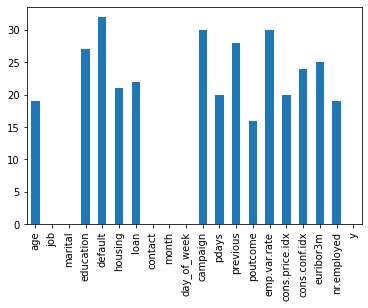

In [23]:
#Distribution of the missing values over the dataset's features 
missing_per_column.plot(kind = 'bar')

In [24]:
# Treating missing values for the column Age 

In [25]:
# Check the statistics and destribution of the values of this feature to decide if it is better to 
# replacec the missing values with the mean or the median. From the boxplot we can see that there are 
# many outliers above the upper quartile and most values are up to 48 years old. Therefore, the median  
# is a more accurate representation because the distribution is skewed and there are clear outliers. 

In [26]:
a = marketing_data['age']
a.describe()

count    9261.000000
mean       40.464421
std        11.969497
min        17.000000
25%        32.000000
50%        38.000000
75%        48.000000
max        98.000000
Name: age, dtype: float64

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

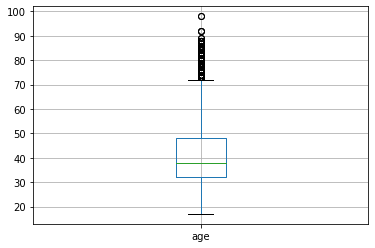

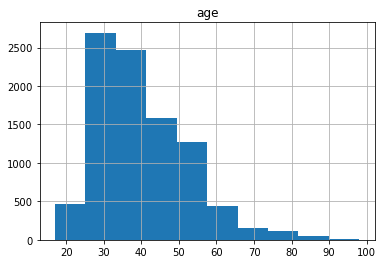

In [27]:
marketing_data.boxplot('age')
marketing_data.hist('age')

In [28]:
# Calculate the median and replace null values 

In [29]:
marketing_data['age'].median()

38.0

In [30]:
marketing_data['age'].fillna(marketing_data['age'].median(),\
                              inplace=True)

In [31]:
marketing_data.isnull().sum()

age                0
job                0
marital            0
education         27
default           32
housing           21
loan              22
contact            0
month              0
day_of_week        0
campaign          30
pdays             20
previous          28
poutcome          16
emp.var.rate      30
cons.price.idx    20
cons.conf.idx     24
euribor3m         25
nr.employed       19
y                  0
dtype: int64

In [32]:
# Treating missing values for the column Education by replacing them with the mode.

<AxesSubplot:>

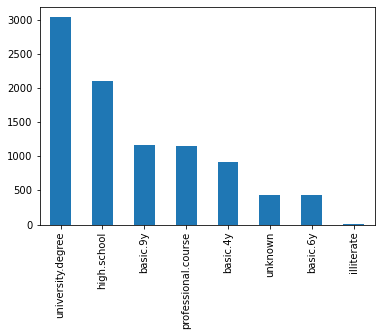

In [33]:
value_counts_for_education = marketing_data['education'].value_counts()
value_counts_for_education.plot(kind = 'bar') 

In [34]:
mode = marketing_data['education'].mode()
mode[0]

'university.degree'

In [35]:
marketing_data['education'].fillna(marketing_data['education'].mode()[0],\
                               inplace=True)

In [36]:
marketing_data.isnull().sum()

age                0
job                0
marital            0
education          0
default           32
housing           21
loan              22
contact            0
month              0
day_of_week        0
campaign          30
pdays             20
previous          28
poutcome          16
emp.var.rate      30
cons.price.idx    20
cons.conf.idx     24
euribor3m         25
nr.employed       19
y                  0
dtype: int64

In [37]:
# Treating missing values for the column Default by replacing them with the mode because it is suitable for categorical data. 

<AxesSubplot:>

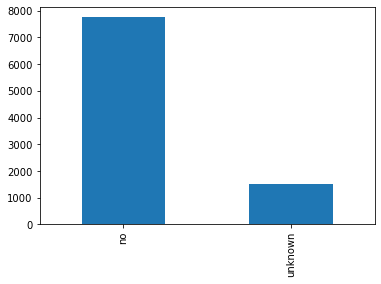

In [38]:
value_counts_for_default = marketing_data['default'].value_counts()
value_counts_for_default.plot(kind = 'bar')

In [39]:
mode = marketing_data['default'].mode()
mode[0]

'no'

In [40]:
marketing_data['default'].fillna(marketing_data['default'].mode()[0],\
                               inplace=True)

In [41]:
marketing_data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing           21
loan              22
contact            0
month              0
day_of_week        0
campaign          30
pdays             20
previous          28
poutcome          16
emp.var.rate      30
cons.price.idx    20
cons.conf.idx     24
euribor3m         25
nr.employed       19
y                  0
dtype: int64

In [42]:
# Treating missing values for the column Housing by replacing them with the mode because it is suitable for categorical data. 

<AxesSubplot:>

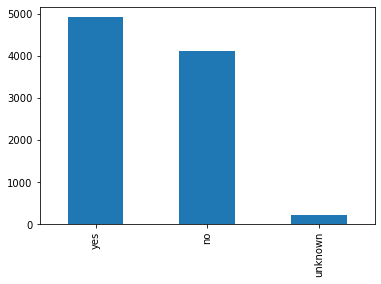

In [43]:
value_counts_for_housing = marketing_data['housing'].value_counts()
value_counts_for_housing.plot(kind = 'bar')

In [44]:
mode = marketing_data['housing'].mode()
mode[0]
marketing_data['housing'].fillna(marketing_data['housing'].mode()[0],\
                               inplace=True)
marketing_data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan              22
contact            0
month              0
day_of_week        0
campaign          30
pdays             20
previous          28
poutcome          16
emp.var.rate      30
cons.price.idx    20
cons.conf.idx     24
euribor3m         25
nr.employed       19
y                  0
dtype: int64

In [45]:
# Treating missing values for the column Loan by replacing them with the mode because it is suitable for categorical data. 

In [46]:
mode = marketing_data['loan'].mode()
mode[0]
marketing_data['loan'].fillna(marketing_data['loan'].mode()[0],\
                               inplace=True)
marketing_data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
campaign          30
pdays             20
previous          28
poutcome          16
emp.var.rate      30
cons.price.idx    20
cons.conf.idx     24
euribor3m         25
nr.employed       19
y                  0
dtype: int64

In [47]:
# Treating missing values for the column Campaign.

In [48]:
# Check the statistics and destribution of the values of this feature to decide if it is better to 
# replace the missing values with the mean or the median.The median is a more accurate representation 
# because the distribution is skewed and there are clear outliers, though in this case the mean and median are close. 

In [49]:
a = marketing_data['campaign']
a.describe()

count    9250.000000
mean        2.321514
std         2.296910
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        35.000000
Name: campaign, dtype: float64

array([[<AxesSubplot:title={'center':'campaign'}>]], dtype=object)

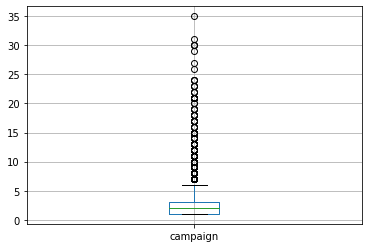

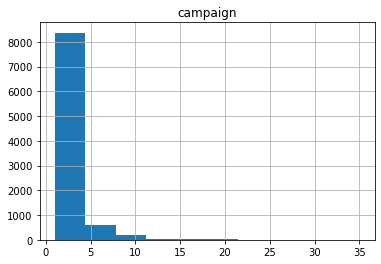

In [50]:
marketing_data.boxplot('campaign')
marketing_data.hist('campaign')

In [51]:
marketing_data['campaign'].median()

2.0

In [52]:
marketing_data['campaign'].fillna(marketing_data['campaign'].median(),\
                              inplace=True)

In [53]:
marketing_data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
campaign           0
pdays             20
previous          28
poutcome          16
emp.var.rate      30
cons.price.idx    20
cons.conf.idx     24
euribor3m         25
nr.employed       19
y                  0
dtype: int64

In [54]:
# Treating missing values for the column Pdays

In [55]:
# The missing data for this feature were deleted. There are not many therefore it will not create a bias in the data. 
# Replacing with the mean in this case is not suitable. 

In [56]:
a = marketing_data['pdays']
a.describe()

count    9260.000000
mean      888.323002
std       312.529933
min         0.000000
25%       999.000000
50%       999.000000
75%       999.000000
max       999.000000
Name: pdays, dtype: float64

array([[<AxesSubplot:title={'center':'pdays'}>]], dtype=object)

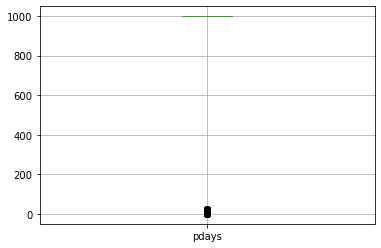

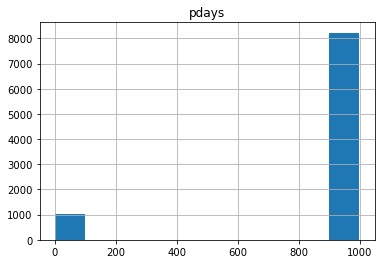

In [57]:
marketing_data.boxplot('pdays')
marketing_data.hist('pdays')

In [58]:
marketing_data.dropna(subset=['pdays'],inplace=True)

In [59]:
marketing_data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
campaign           0
pdays              0
previous          28
poutcome          16
emp.var.rate      30
cons.price.idx    20
cons.conf.idx     24
euribor3m         25
nr.employed       19
y                  0
dtype: int64

In [60]:
# Treating missing values for the column Previous

array([[<AxesSubplot:title={'center':'previous'}>]], dtype=object)

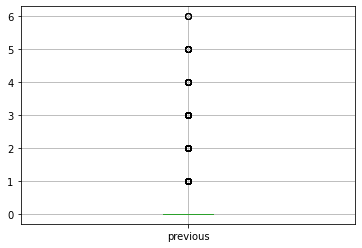

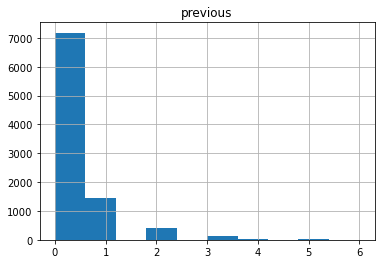

In [61]:
marketing_data.boxplot('previous')
marketing_data.hist('previous')

In [62]:
marketing_data.dropna(subset=['previous'],inplace=True)

In [63]:
marketing_data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
campaign           0
pdays              0
previous           0
poutcome          16
emp.var.rate      30
cons.price.idx    19
cons.conf.idx     24
euribor3m         25
nr.employed       19
y                  0
dtype: int64

In [64]:
# Treating missing values for the column Poutcome with mode because it is suitable for categorical data 

<AxesSubplot:>

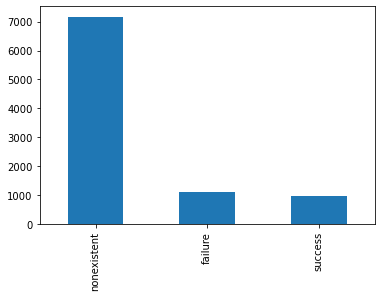

In [65]:
value_counts_for_poutcome = marketing_data['poutcome'].value_counts()
value_counts_for_poutcome.plot(kind = 'bar') 

In [66]:
mode = marketing_data['poutcome'].mode()
mode[0]
marketing_data['poutcome'].fillna(marketing_data['poutcome'].mode()[0],\
                               inplace=True)
marketing_data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate      30
cons.price.idx    19
cons.conf.idx     24
euribor3m         25
nr.employed       19
y                  0
dtype: int64

In [67]:
# The socio-economic indicators are grouped based on the month becuase they were added based on the month the 
#contact was made. The mean of each month is used to fill in the missing values for these featres 

In [68]:
marketing_data.fillna(marketing_data.groupby('month').transform('mean'), inplace=True)

In [69]:
#Check that all nulls are removed 
marketing_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [70]:
# Part D - Explore for potential duplicates and if so remove them

In [71]:
# Check if there are any duplicate rows
duplicate_rows = marketing_data.duplicated()

In [72]:
# Find the number of duplicated rows 
duplicate_rows.sum()

351

In [73]:
#Remove duplicates 

In [74]:
marketing_data.drop_duplicates(inplace=True)

In [75]:
#Check if duplicates were removed 
marketing_data.duplicated().sum()

0

In [76]:
# Part E - Explore for potential outliers on numerical features and decide if you will remove them 

In [77]:
#Created an additional feature called conducted_bef too indicated if the customer was conducted before or not. 
#The feature 999 is replaced with 0 because it is closed to the distribution of the data.

In [78]:
conditions = [(marketing_data['pdays'] == 999), (marketing_data['pdays'] != 999)]
values =  ['no', 'yes']

marketing_data.insert(19, 'coducted_bef', np.select(conditions, values))

In [79]:
marketing_data['pdays'].replace(
    to_replace=[999],
    value= 0,
    inplace=True)

marketing_data.sample(n=30)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,coducted_bef,y
24023,41.0,admin.,single,high.school,no,no,no,telephone,oct,tue,...,0.0,0.0,nonexistent,-0.1,93.798,-40.4,4.968,5195.8,no,no
14150,23.0,blue-collar,single,basic.9y,no,no,yes,cellular,jul,mon,...,0.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,no
39291,46.0,unemployed,single,university.degree,no,no,no,cellular,mar,tue,...,10.0,2.0,success,-1.8,93.369,-34.8,0.646,5008.7,yes,yes
28990,42.0,admin.,married,unknown,no,no,no,cellular,apr,fri,...,0.0,1.0,failure,-1.8,93.075,-47.1,1.405,5099.1,no,yes
30099,41.0,admin.,married,high.school,no,no,no,cellular,apr,mon,...,0.0,0.0,nonexistent,-1.8,93.075,-47.1,1.392,5099.1,no,no
39873,37.0,unemployed,married,university.degree,no,yes,no,telephone,jun,tue,...,2.0,2.0,success,-1.7,94.055,-39.8,0.723,4991.6,yes,no
37934,18.0,student,single,unknown,no,unknown,unknown,cellular,sep,thu,...,0.0,0.0,nonexistent,-3.4,92.379,-29.8,0.809,5017.5,no,no
23605,32.0,unemployed,married,university.degree,no,no,no,cellular,aug,thu,...,0.0,0.0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no,no
40028,25.0,blue-collar,single,basic.9y,no,no,yes,cellular,jul,fri,...,0.0,0.0,nonexistent,-1.7,94.215,-40.3,0.790,4991.6,no,yes
3025,26.0,blue-collar,single,basic.9y,no,no,no,telephone,may,wed,...,0.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no,no


In [80]:
# Create and examine the box plots for outliers 

In [81]:
#Campaign

<AxesSubplot:>

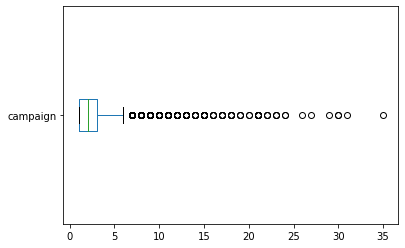

In [82]:
marketing_data['campaign'].plot(kind='box', vert=False)

<AxesSubplot:>

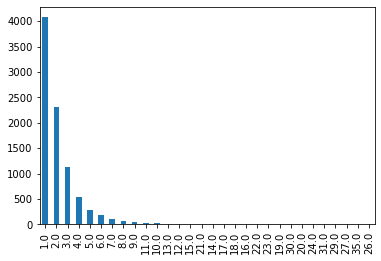

In [83]:
value_counts_for_camp = marketing_data['campaign'].value_counts()
value_counts_for_camp.plot(kind = 'bar')

In [84]:
marketing_data_camp = marketing_data['campaign']

In [85]:
#Most values are between the P95 and P5.  
#The values outside this range are removed. 

In [86]:
marketing_data_camp.describe()

count    8881.000000
mean        2.310776
std         2.255081
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        35.000000
Name: campaign, dtype: float64

In [87]:
P95 = marketing_data_camp.quantile(0.95)
P5 = marketing_data_camp.quantile(0.05)
print(P95)
print(P5)
is_outlier_alternative = (marketing_data_camp > P95) \
| (marketing_data_camp< P5)

6.0
1.0


In [88]:
marketing_data_treated = marketing_data[~is_outlier_alternative]

<AxesSubplot:>

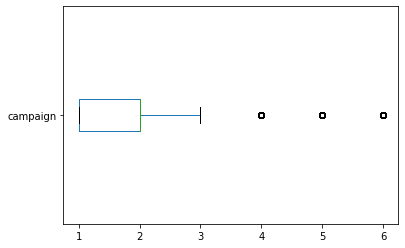

In [89]:
marketing_data_treated['campaign'].plot(kind='box', vert=False)

In [90]:
#Pdays

<AxesSubplot:>

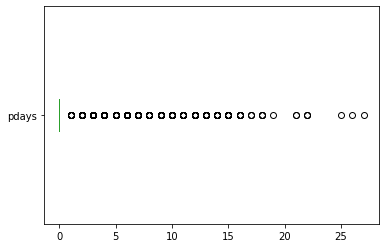

In [91]:
marketing_data_treated['pdays'].plot(kind='box', vert=False)

In [92]:
marketing_data_pd = marketing_data ['pdays']

In [93]:
marketing_data_treated_dp = marketing_data_treated['pdays']
Q95 = marketing_data_treated_dp.quantile(0.95)

print(P95)

is_outlier = (marketing_data_treated_dp > P95) 

6.0


In [94]:
marketing_data_treated2 = marketing_data_treated[~is_outlier]

In [95]:
marketing_data_treated2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,coducted_bef,y
34579,35.0,admin.,single,university.degree,no,yes,no,cellular,may,thu,...,0.0,1.0,failure,-1.8,92.893,-46.2,1.266,5099.1,no,no
446,42.0,technician,married,professional.course,no,no,no,telephone,may,tue,...,0.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,yes
20173,36.0,admin.,married,university.degree,no,no,no,cellular,aug,mon,...,0.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,yes
18171,37.0,admin.,married,high.school,no,yes,yes,telephone,jul,wed,...,0.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,yes
30128,31.0,management,single,university.degree,no,yes,no,cellular,apr,thu,...,0.0,0.0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36850,53.0,housemaid,married,basic.4y,no,no,yes,cellular,jun,tue,...,0.0,0.0,nonexistent,-2.9,92.963,-40.8,1.252,5076.2,no,yes
6362,45.0,blue-collar,married,basic.6y,unknown,no,no,telephone,may,tue,...,0.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,yes
28870,45.0,blue-collar,married,unknown,no,yes,no,cellular,apr,thu,...,0.0,1.0,failure,-1.8,93.075,-47.1,1.410,5099.1,no,yes
30452,60.0,admin.,married,university.degree,no,yes,no,cellular,may,mon,...,0.0,0.0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,no,yes


In [96]:
#Previous 

<AxesSubplot:>

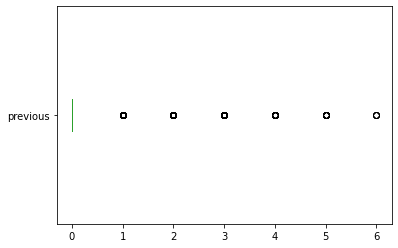

In [97]:
marketing_data['previous'].plot(kind='box', vert=False)

<AxesSubplot:>

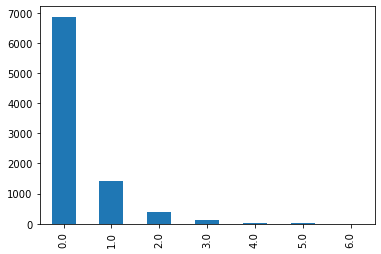

In [98]:
value_counts_for_prev = marketing_data['previous'].value_counts()
value_counts_for_prev.plot(kind = 'bar')

In [99]:
#The outliers for the feature previous were not removed because they are part of the 
#natural variation of the data.If many customer were conduted for the first time the value would be zero.
#By not removing the outliers we keep information on pople that had been conducted before. 

<AxesSubplot:>

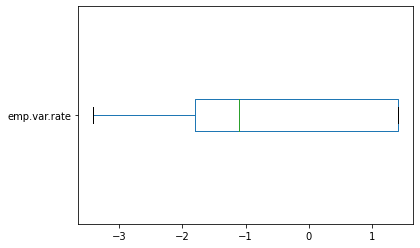

In [100]:
marketing_data['emp.var.rate'].plot(kind='box', vert=False)

<AxesSubplot:>

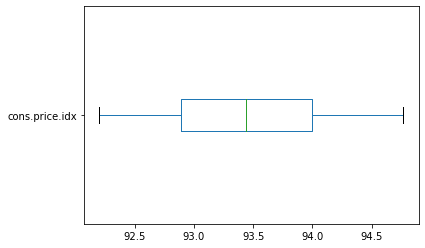

In [101]:
marketing_data['cons.price.idx'].plot(kind='box', vert=False)

<AxesSubplot:>

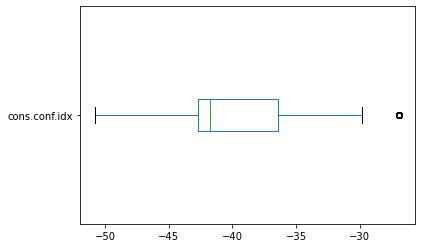

In [102]:
marketing_data['cons.conf.idx'].plot(kind='box', vert=False)

In [103]:
# Outliers for the feature cons.conf.idx were not removed because the outliers are not very far from the rest values. 

<AxesSubplot:>

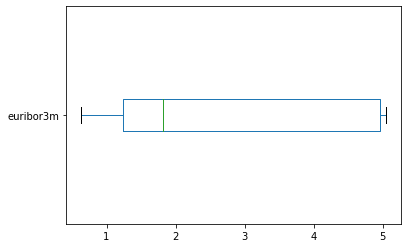

In [104]:
marketing_data['euribor3m'].plot(kind='box', vert=False)

<AxesSubplot:>

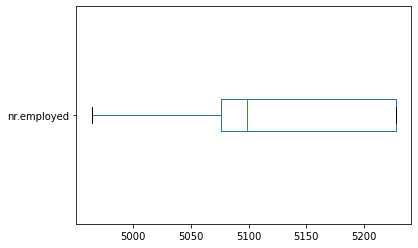

In [105]:
marketing_data['nr.employed'].plot(kind='box', vert=False)

In [106]:
marketing_data_treated2.sample(n=30)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,coducted_bef,y
13551,35.0,admin.,single,university.degree,unknown,no,no,cellular,jul,thu,...,0.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,yes
10987,32.0,blue-collar,single,high.school,no,yes,no,telephone,jun,wed,...,0.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,no
8265,43.0,blue-collar,married,basic.9y,no,no,yes,telephone,jun,tue,...,0.0,0.0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no,no
5715,45.0,blue-collar,married,basic.9y,no,no,no,telephone,may,mon,...,0.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
6481,53.0,blue-collar,married,basic.9y,no,yes,no,telephone,may,wed,...,0.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
21283,42.0,technician,married,professional.course,no,yes,yes,cellular,aug,mon,...,0.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,no
15654,25.0,technician,single,professional.course,no,yes,no,cellular,jul,mon,...,0.0,0.0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,no
34018,41.0,services,married,high.school,no,yes,no,cellular,may,wed,...,0.0,0.0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no,yes
38634,37.0,admin.,married,high.school,no,no,yes,cellular,nov,mon,...,0.0,0.0,nonexistent,-3.4,92.649,-30.1,0.722,5017.5,no,no
26030,46.0,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,...,0.0,0.0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no,no


In [107]:
#Part F - Convert the age feature into a categorical variable with three possible values: Young, Middle and Old.

In [108]:
def age_classif(i):
    x = int(i)
    if x <= 35:
        return 'Young'
    elif x <= 60:
        return 'Middle'
    elif x > 60:
        return 'Old'
    else:
        return None 

In [109]:
marketing_data_treated2['age'] = marketing_data_treated2['age'].map(age_classif)

<ipython-input-109-c5ad2fee8ece>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data_treated2['age'] = marketing_data_treated2['age'].map(age_classif)


In [110]:
marketing_data_treated2.sample(n=30)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,coducted_bef,y
38768,Middle,management,married,high.school,no,no,no,cellular,nov,thu,...,0.0,0.0,nonexistent,-3.4,92.649,-30.1,0.714,5017.5,no,yes
20137,Young,technician,married,high.school,no,yes,no,cellular,aug,mon,...,0.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,no
20626,Middle,blue-collar,married,high.school,unknown,yes,no,cellular,aug,wed,...,0.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,yes
37952,Old,management,married,unknown,no,no,no,cellular,sep,fri,...,0.0,0.0,nonexistent,-3.4,92.379,-29.8,0.803,5017.5,no,yes
40178,Middle,admin.,married,university.degree,no,no,yes,cellular,jul,fri,...,0.0,0.0,nonexistent,-1.7,94.215,-40.3,0.861,4991.6,no,yes
30654,Young,admin.,married,university.degree,no,yes,no,cellular,may,tue,...,0.0,1.0,failure,-1.8,92.893,-46.2,1.344,5099.1,no,no
1865,Middle,entrepreneur,married,unknown,unknown,yes,no,telephone,may,fri,...,0.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,no
11659,Middle,entrepreneur,married,university.degree,unknown,no,no,telephone,jun,fri,...,0.0,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,no
1419,Young,self-employed,divorced,professional.course,no,no,no,telephone,may,thu,...,0.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,no
28488,Young,unemployed,single,university.degree,no,yes,no,cellular,apr,tue,...,0.0,0.0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no,yes


In [111]:
# Separate the feature space and the class labels

In [112]:
x = marketing_data_treated2.iloc[:,0:21]
y = marketing_data_treated2['y']

print(x)

          age          job  marital            education  default housing  \
34579   Young       admin.   single    university.degree       no     yes   
446    Middle   technician  married  professional.course       no      no   
20173  Middle       admin.  married    university.degree       no      no   
18171  Middle       admin.  married          high.school       no     yes   
30128   Young   management   single    university.degree       no     yes   
...       ...          ...      ...                  ...      ...     ...   
36850  Middle    housemaid  married             basic.4y       no      no   
6362   Middle  blue-collar  married             basic.6y  unknown      no   
28870  Middle  blue-collar  married              unknown       no     yes   
30452  Middle       admin.  married    university.degree       no     yes   
28937  Middle  blue-collar  married             basic.9y       no     yes   

      loan    contact month day_of_week  ...  pdays  previous     poutcome 

In [113]:
# Part H - Compute and plot the correlation between features (correlation matrix)
#State and explore three potential relationships between feature

In [114]:
correlation_matrix = x.corr()
correlation_matrix

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
campaign,1.000000,-0.057000,-0.070851,0.149431,0.101738,-0.024107,0.132452,0.135230
pdays,-0.057000,1.000000,0.629711,-0.272949,-0.015047,0.154918,-0.323124,-0.408654
previous,-0.070851,0.629711,1.000000,-0.362238,-0.070314,0.064893,-0.421817,-0.488531
emp.var.rate,0.149431,-0.272949,-0.362238,1.000000,0.729018,-0.063295,0.955836,0.867043
cons.price.idx,0.101738,-0.015047,-0.070314,0.729018,1.000000,-0.160461,0.583314,0.365006
cons.conf.idx,-0.024107,0.154918,0.064893,-0.063295,-0.160461,1.000000,0.044083,-0.090236
euribor3m,0.132452,-0.323124,-0.421817,0.955836,0.583314,0.044083,1.000000,0.938369
nr.employed,0.135230,-0.408654,-0.488531,0.867043,0.365006,-0.090236,0.938369,1.000000


In [115]:
#From the correalation matrix we can see that:
#Relationship 1: There is a high positive correlation between  nr.employed and euribor3m
#Relationship 2: There is a high positive correlation between  emp.var.rate and euribor3m. 
#We can choose to drop one of the features wich are highly corellated with each other to reduce dimentionality. 

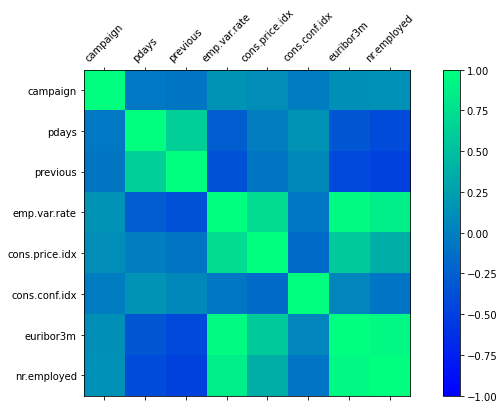

In [116]:
fig, ax = plt.subplots(figsize=(12,6))
im = ax.matshow(correlation_matrix, cmap = 'winter',vmin = -1, vmax = 1,)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar(im)
plt.show()

In [117]:
#Relationhip 3: Check if there is a relation between age and education by performing a chi squared test. 

In [118]:
education_job_table = pd.crosstab(marketing_data_treated2['age'], marketing_data_treated2['education'])

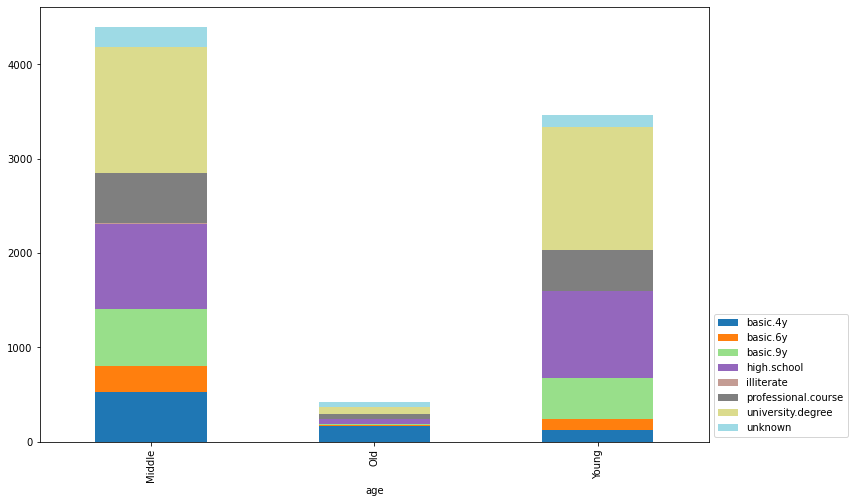

In [119]:
education_job_table.\
plot(kind='bar', stacked = True,\
figsize=(12,8), legend=True, colormap='tab20')
plt.legend(bbox_to_anchor = (1,0), loc='lower left')

In [120]:
education_job_table.head()

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
age,,,,,,,,
Middle,527,269,604,910,4,533,1340,203
Old,168,10,12,50,1,50,76,51
Young,122,120,430,920,1,440,1302,126


In [121]:
#Add the total of the columns and rows to create the contingency table

In [122]:
education_job_table_margins = \
pd.crosstab(marketing_data_treated2['age'],\
            marketing_data_treated2['education'], margins=True)

In [123]:
education_job_table_margins

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown,All
age,,,,,,,,,
Middle,527,269,604,910,4,533,1340,203,4390
Old,168,10,12,50,1,50,76,51,418
Young,122,120,430,920,1,440,1302,126,3461
All,817,399,1046,1880,6,1023,2718,380,8269


In [124]:
education_job_table_margins.shape

(4, 9)

In [125]:
row_marginals = education_job_table_margins.iloc[0:3, 8]
row_marginals

age
Middle    4390
Old        418
Young     3461
Name: All, dtype: int64

In [126]:
column_marginals = education_job_table_margins.iloc[3,0:8]
column_marginals

education
basic.4y                817
basic.6y                399
basic.9y               1046
high.school            1880
illiterate                6
professional.course    1023
university.degree      2718
unknown                 380
Name: All, dtype: int64

In [127]:
education_job_table_margins.columns != 'All'

array([ True,  True,  True,  True,  True,  True,  True,  True, False])

In [128]:
column_marginals = education_job_table_margins.loc['All', education_job_table_margins.columns != 'All']
column_marginals

education
basic.4y                817
basic.6y                399
basic.9y               1046
high.school            1880
illiterate                6
professional.course    1023
university.degree      2718
unknown                 380
Name: All, dtype: int64

In [129]:
#Construct Expected Frequency Table
expected = np.outer(row_marginals, column_marginals) / 8269


In [130]:
type(expected)

numpy.ndarray

In [131]:
expected = pd.DataFrame(expected)
expected

,0,1,2,3,4,5,6,7
0,433.744104,211.828516,555.319869,998.089249,3.185391,543.109203,1442.982223,201.741444
1,41.299553,20.169549,52.875559,95.034466,0.303301,51.712904,137.395574,19.209094
2,341.956343,167.001935,437.804571,786.876285,2.511307,428.177893,1137.622203,159.049462


In [132]:
observed = education_job_table.copy()

In [133]:
expected.columns = observed.columns
expected.index = observed.index

In [134]:
(((observed-expected)**2)/expected).sum().sum()

792.9724972432352

In [135]:
chi2_statistic = (((observed-expected)**2)/expected).sum().sum()

In [136]:
chi2_statistic

792.9724972432352

In [137]:
degrees_of_freedom = (observed.shape[0]-1)*(observed.shape[1]-1)

In [138]:
p_value = 1 - stats.chi2.cdf(x=chi2_statistic,  df=degrees_of_freedom)

In [139]:
print('For x2 statistic {0:.3f} and {1} degrees of freedom the p value is {2:.5f}'.\
     format(chi2_statistic, degrees_of_freedom, p_value))

For x2 statistic 792.972 and 14 degrees of freedom the p value is 0.00000


In [140]:
# H0:There is no significant relationship between age and education
# H1: There is a significant relationship between age and education 

#Based on the results of the chi squared test we can reject the null 
#hypothesis beccause the p value is small. 


In [141]:
#Part I - Convert catergorical data to numerical data 

In [142]:
#Because age feature is ordinal  it was encoded to integer values 

In [143]:
marketing_data_treated2['age'].unique()

array(['Young', 'Middle', 'Old'], dtype=object)

In [144]:
age_levels_dict = {'Young':0, 'Middle':1, 'Old':2,}

In [145]:
marketing_data_treated2['age'] =\
marketing_data_treated2['age'].map(age_levels_dict)

<ipython-input-145-06dc01eeccfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data_treated2['age'] =\


In [146]:
#Education feature was also encoded to integers because it is  ordinal 
#(assuming that professional course is the highest level of education)

In [147]:
marketing_data_treated2['education'].unique()

array(['university.degree', 'professional.course', 'high.school',
       'basic.9y', 'basic.4y', 'basic.6y', 'unknown', 'illiterate'],
      dtype=object)

In [148]:
education_levels_dict = {'unknown':0, 'illiterate':1, 'basic.4y':2,\
                        'basic.6y':3,'basic.9y' :4, 'high.school' :5,\
                        'university.degree':6,'professional.course':7 }

In [149]:
marketing_data_treated2['education'] =\
marketing_data_treated2['education'].map(education_levels_dict)

<ipython-input-149-31f4202a59d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data_treated2['education'] =\


In [150]:
marketing_data_treated2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,coducted_bef,y
34579,0,admin.,single,6,no,yes,no,cellular,may,thu,...,0.0,1.0,failure,-1.8,92.893,-46.2,1.266,5099.1,no,no
446,1,technician,married,7,no,no,no,telephone,may,tue,...,0.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,yes
20173,1,admin.,married,6,no,no,no,cellular,aug,mon,...,0.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,yes
18171,1,admin.,married,5,no,yes,yes,telephone,jul,wed,...,0.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,yes
30128,0,management,single,6,no,yes,no,cellular,apr,thu,...,0.0,0.0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36850,1,housemaid,married,2,no,no,yes,cellular,jun,tue,...,0.0,0.0,nonexistent,-2.9,92.963,-40.8,1.252,5076.2,no,yes
6362,1,blue-collar,married,3,unknown,no,no,telephone,may,tue,...,0.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,yes
28870,1,blue-collar,married,0,no,yes,no,cellular,apr,thu,...,0.0,1.0,failure,-1.8,93.075,-47.1,1.410,5099.1,no,yes
30452,1,admin.,married,6,no,yes,no,cellular,may,mon,...,0.0,0.0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,no,yes


In [151]:
#The rest of features (job, default, housing, laon, contact, month, 
#day_of_the_week,poutcome, y and conducted_bef) are nominal therefore 
#the One-Hot-Encoding approach is applied  

In [152]:
features_converted_df = pd.get_dummies(marketing_data_treated2[['job','marital', 'housing', 'loan', 'month', 'day_of_week', 'poutcome']])

In [153]:
features_converted_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
34579,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
446,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
20173,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
18171,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30128,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36850,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6362,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
28870,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
30452,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [154]:
marketing_data_converted_df = marketing_data_treated2.copy()
marketing_data_converted_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,coducted_bef,y
34579,0,admin.,single,6,no,yes,no,cellular,may,thu,...,0.0,1.0,failure,-1.8,92.893,-46.2,1.266,5099.1,no,no
446,1,technician,married,7,no,no,no,telephone,may,tue,...,0.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,yes
20173,1,admin.,married,6,no,no,no,cellular,aug,mon,...,0.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,yes
18171,1,admin.,married,5,no,yes,yes,telephone,jul,wed,...,0.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,yes
30128,0,management,single,6,no,yes,no,cellular,apr,thu,...,0.0,0.0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no,no


In [155]:
marketing_data_converted_df.drop(['job','marital', 'housing', 'loan', 'month', 'day_of_week', 'poutcome'],axis=1, inplace=True)
marketing_data_converted_df.head()

,age,education,default,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,coducted_bef,y
34579,0,6,no,cellular,1.0,0.0,1.0,-1.8,92.893,-46.2,1.266,5099.1,no,no
446,1,7,no,telephone,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,no,yes
20173,1,6,no,cellular,2.0,0.0,0.0,1.4,93.444,-36.1,4.965,5228.1,no,yes
18171,1,5,no,telephone,2.0,0.0,0.0,1.4,93.918,-42.7,4.963,5228.1,no,yes
30128,0,6,no,cellular,1.0,0.0,0.0,-1.8,93.075,-47.1,1.365,5099.1,no,no


In [156]:
marketing_data_features_converted_df = marketing_data_converted_df.join(features_converted_df)
marketing_data_features_converted_df.head(n=10)


,age,education,default,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
1,1,5,unknown,telephone,1.0,0.0,0.0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
5,1,4,unknown,telephone,1.0,0.0,0.0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
31,1,0,no,telephone,1.0,0.0,0.0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
52,1,5,no,telephone,1.0,0.0,0.0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
53,1,7,no,telephone,1.0,0.0,0.0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
65,1,6,no,telephone,1.0,0.0,0.0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
71,1,6,no,telephone,1.0,0.0,0.0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
74,1,6,unknown,telephone,1.0,0.0,0.0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
75,1,2,unknown,telephone,1.0,0.0,0.0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
83,1,6,unknown,telephone,1.0,0.0,0.0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0


In [157]:
default_map = {'no':0, 'unknown':1}
marketing_data_features_converted_df['default'] =\
marketing_data_features_converted_df['default'].map(default_map)

In [158]:
contact_map = {'cellular':0, 'telephone':1}
marketing_data_features_converted_df['contact'] =\
marketing_data_features_converted_df['contact'].map(contact_map)

In [159]:
y_map = {'no':0, 'yes':1}
marketing_data_features_converted_df['y'] =\
marketing_data_features_converted_df['y'].map(y_map)

In [160]:
coducted_bef_map = {'no':0, 'yes':1}
marketing_data_features_converted_df['coducted_bef'] =\
marketing_data_features_converted_df['coducted_bef'].map(coducted_bef_map)

In [161]:
marketing_data_features_converted_df.head()

,age,education,default,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
1,1,5,1,1,1.0,0.0,0.0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
5,1,4,1,1,1.0,0.0,0.0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
31,1,0,0,1,1.0,0.0,0.0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
52,1,5,0,1,1.0,0.0,0.0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
53,1,7,0,1,1.0,0.0,0.0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0


In [162]:
# Part J -Perform a PCA analysis on the feature space. 
# How many principal components are required to capture at least 80% 
# of the dataset’s variance? How about 100%?

In [163]:
#Confirm that there are no null values. 

In [164]:
marketing_data_features_converted_df.info()
marketing_data_features_converted_df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8287 entries, 1 to 41186
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   8287 non-null   int64  
 1   education             8287 non-null   int64  
 2   default               8287 non-null   int64  
 3   contact               8287 non-null   int64  
 4   campaign              8287 non-null   float64
 5   pdays                 8287 non-null   float64
 6   previous              8287 non-null   float64
 7   emp.var.rate          8287 non-null   float64
 8   cons.price.idx        8287 non-null   float64
 9   cons.conf.idx         8287 non-null   float64
 10  euribor3m             8287 non-null   float64
 11  nr.employed           8287 non-null   float64
 12  coducted_bef          8287 non-null   int64  
 13  y                     8287 non-null   int64  
 14  job_admin.            8287 non-null   uint8  
 15  job_blue-collar     

0

In [165]:
# Separate the feature space and the class labels and encode them

In [166]:
x1 = marketing_data_features_converted_df.loc[:, marketing_data_features_converted_df.columns != 'y']

In [167]:
class_le = LabelEncoder()
y1 = class_le.fit_transform(marketing_data_features_converted_df['y'])

In [168]:
# Standardise the feature space

In [169]:
sc = StandardScaler()
sc.fit(x1)
x1_std = sc.transform(x1)

In [170]:
# Apply the PCA method 

In [171]:
pca_all = PCA(n_components=None)

In [172]:
x1_transformed = pca_all.fit_transform(x1_std)

In [173]:
explained_variance_ratio = pca_all.explained_variance_ratio_
print(explained_variance_ratio)

[1.11300213e-01 5.31546765e-02 4.55087633e-02 4.38795621e-02
 3.84551673e-02 3.63471820e-02 3.24337609e-02 3.14600163e-02
 2.97029865e-02 2.77042848e-02 2.69227663e-02 2.46997099e-02
 2.42956790e-02 2.41329392e-02 2.39702839e-02 2.33654773e-02
 2.27904346e-02 2.23013123e-02 2.17861604e-02 2.08092108e-02
 2.05324384e-02 2.01807650e-02 1.99013271e-02 1.96696113e-02
 1.95078419e-02 1.93706451e-02 1.88286639e-02 1.87261545e-02
 1.82699934e-02 1.73895609e-02 1.68613270e-02 1.67712723e-02
 1.53067080e-02 1.49225058e-02 1.37894979e-02 9.73209813e-03
 9.33062465e-03 8.76067909e-03 7.22215289e-03 4.03995898e-03
 3.32715538e-03 1.97054125e-03 2.63128548e-04 1.57356160e-04
 9.44784666e-05 5.29276612e-05 2.19500966e-32 3.96157947e-33
 1.09475967e-33 9.42546835e-34 8.38112516e-34 8.21641580e-34
 1.75645548e-34]


In [174]:
my_list = range(len(explained_variance_ratio))

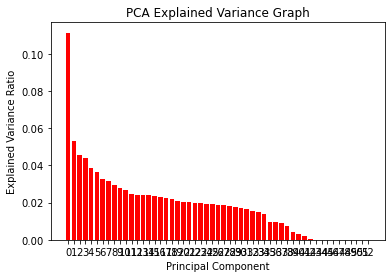

In [175]:
plt.bar(range(len(explained_variance_ratio)),\
        explained_variance_ratio, color='r')
plt.xticks(my_list, my_list)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Graph')
plt.show()

In [176]:
#Principal Components histogram

In [177]:
cumulative_explained_ratio = explained_variance_ratio.cumsum()

<BarContainer object of 53 artists>

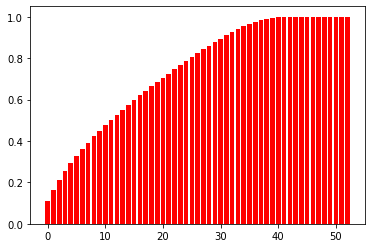

In [178]:
plt.bar(range(len(explained_variance_ratio)),\
        cumulative_explained_ratio, color='r')

In [179]:
#The cumulative sum of ratios reaches 80% at the 26th element. 
#Thus, we will need 26 Principal Components to capture 80% of 
#the datasets variance. 

In [180]:
#The cumulative sum of ratios reaches 100% at the 40th element. 
#Thus, we will need 40 Principal Components to capture 100% of 
#the datasets variance. 

In [181]:
# Perform the PCA analysis with 26 Principal Components to capture 80% of the datasets variance. 
pca = PCA(n_components=26)

In [182]:
x1_transformed = pca.fit_transform(x1_std)

In [183]:
pca.explained_variance_ratio_

array([0.11130021, 0.05315458, 0.04550859, 0.04387952, 0.03845498,
       0.03634645, 0.03243369, 0.03145979, 0.02969586, 0.0276966 ,
       0.02690678, 0.02469837, 0.02429018, 0.02412794, 0.02396957,
       0.02336343, 0.02278145, 0.02230039, 0.02170312, 0.0207929 ,
       0.02051743, 0.02009982, 0.0198649 , 0.01966499, 0.01949733,
       0.01936118])

In [184]:
print('The total explained variance by this tranformation is {0:.2f}'\
      .format(pca.explained_variance_ratio_.sum()))

The total explained variance by this tranformation is 0.80


In [185]:
#Exercise 2 

In [186]:
#Fiting the models 
#x1_transformed and y1 are used from above 

In [187]:
# Split our dataset into training and testing datasets
X_train, X_test, y_train, y_test\
= train_test_split(x1_transformed, y1, test_size = 0.3, random_state=1)

In [188]:
#Scale the features
sc.fit(X_train)
X_train_Std = sc.transform(X_train)

In [189]:
# Fit the logistic regression model 

In [190]:
lr_classifier = LogisticRegression(C=0.0001, penalty='l2', random_state=1)

In [191]:
# Train the classifier using our training dataset (features and labels)
lr_classifier.fit(X_train_Std, y_train)

LogisticRegression(C=0.0001, random_state=1)

In [192]:
# Test the classifier's performance
# Make some predictions using the testing dataset

In [193]:
y_pred1 = lr_classifier.predict(sc.transform(X_test))

In [194]:
print('Misclassified samples {0} out of {1}, i.e. {2:.2f}% accurate'.\
      format((y_test != y_pred1).sum(), len(y_test), (1 - (y_test != y_pred1).sum()/len(y_test))*100))

Misclassified samples 737 out of 2487, i.e. 70.37% accurate


In [195]:
#Compute and print the confusion matrix

In [196]:
conf_matrix = confusion_matrix(y_test, y_pred1)
print(conf_matrix)

[[775 456]
 [281 975]]


In [197]:
#Accuracy

In [198]:
accuracy1 =  accuracy_score(y_test, y_pred1)
print("The senisitivity of the model is  {0:.2f}"\
      .format(accuracy1))

The senisitivity of the model is  0.70


In [199]:
#Recall

In [200]:
recall1 = recall_score(y_test, y_pred1)
print("The senisitivity of the model is  {0:.2f}"\
      .format(recall1))

The senisitivity of the model is  0.78


In [201]:
#Precision

In [202]:
precision1 = precision_score(y_test, y_pred1)
print("The model model's precision is {0:.2f}".format(precision1))

The model model's precision is 0.68


In [203]:
#Fit the Random Forest model 

In [204]:
rf_classifier = RandomForestClassifier(criterion='entropy',\
                                       n_estimators=20, random_state= 1)

In [205]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=1)

In [206]:
# Test the classifier's performance
# Make some predictions using the testing dataset

In [207]:
y_pred2 = rf_classifier.predict(X_test)

In [208]:
print('Misclassified samples {0} out of {1}, i.e. {2:.2f}% accurate'.\
      format((y_test != y_pred2).sum(), len(y_test),\
             (1 - (y_test != y_pred2).sum()/len(y_test))*100))

Misclassified samples 732 out of 2487, i.e. 70.57% accurate


In [209]:
#Compute and print the confusion matrix

In [210]:
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print(conf_matrix2)

[[909 322]
 [410 846]]


In [211]:
#Accuracy

In [212]:
accuracy2 = accuracy_score(y_test, y_pred2)
print("The accuracy of the model is   {0:.2f}"\
      .format(accuracy2))

The accuracy of the model is   0.71


In [213]:
#Recall

In [214]:
recall2 = recall_score(y_test, y_pred2)
print("The senistivity of the model is   {0:.2f}"\
      .format(recall2))

The senistivity of the model is   0.67


In [215]:
#Precision

In [216]:
precision2 = precision_score(y_test, y_pred1)
print("The model model's precision is {0:.2f}".format(precision2))

The model model's precision is 0.68


In [217]:
#Fit the Neural Network model 

In [218]:
# Then, let's define our Neural Network model. Let's start by defining a model with 2 hidden layers, of 20 logistic
# units each. Let's also set the regularisation parameter equal to 0.01. In this implementation, lambda is denoted 
# by the argument alpha.

In [219]:
mlp_1 =\
MLPClassifier(activation='logistic',hidden_layer_sizes=(10,10,5),\
                      alpha = 1, random_state=0)

In [220]:
mlp_1.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1, hidden_layer_sizes=(10, 10, 5),
              random_state=0)

In [221]:
print('Training score {0:4f}'.format(mlp_1.score(X=X_train, y=y_train)))
print('Testing score {0:4f}'.format(mlp_1.score(X=X_test, y=y_test)))

Training score 0.513103
Testing score 0.505026


In [222]:
# Test the classifier's performance
# Make some predictions using the testing dataset

In [223]:
y_pred3 = mlp_1.predict(X_test)

In [224]:
#Compute and print the confusion matrix

In [225]:
conf_matrix3 = confusion_matrix(y_test, y_pred3)
print(conf_matrix3)

[[   0 1231]
 [   0 1256]]


In [226]:
#Accuracy

In [227]:
accuracy3 = accuracy_score(y_test, y_pred3)
print("The accuracy of the model is   {0:.2f}"\
      .format(accuracy3))

The accuracy of the model is   0.51


In [228]:
#Recall

In [229]:
recall3 = recall_score(y_test, y_pred3)
print("The senistivity of the model is   {0:.2f}"\
      .format(recall3))

The senistivity of the model is   1.00


In [230]:
#Precision

In [231]:
precision3 = precision_score(y_test, y_pred3)
print("The model model's precision is {0:.2f}".format(precision3))

The model model's precision is 0.51


In [232]:
#Calculate the ROC AUC for all 3 models and plot the ROC curve. 

In [233]:
X_test_std = sc.transform(X_test)

In [234]:
lr_pred_probs = lr_classifier.predict_proba(X_test_std)
rf_pred_probs = rf_classifier.predict_proba(X_test_std)
mlp_1_pred_probs = mlp_1.predict_proba(X_test_std)

In [235]:
fpr1, tpr1, thres1 = roc_curve(y_test, lr_pred_probs[:,1], pos_label=1)


In [236]:
fpr2, tpr2, thres2 = roc_curve(y_test, rf_pred_probs[:,1], pos_label=1)

In [237]:
fpr3, tpr3, thres3 = roc_curve(y_test, mlp_1_pred_probs[:,1], pos_label=1)

In [238]:
thres1


array([1.60670952, 0.60670952, 0.59377538, 0.59348666, 0.58393162,
       0.58390029, 0.58119492, 0.58081145, 0.57340365, 0.57313637,
       0.57059649, 0.57036309, 0.56808618, 0.56793841, 0.56562758,
       0.56554347, 0.56450901, 0.56442224, 0.56230829, 0.56225077,
       0.56156017, 0.56150314, 0.56111283, 0.56096021, 0.56000358,
       0.55970682, 0.55792855, 0.55787423, 0.55783563, 0.55771828,
       0.55693894, 0.55689069, 0.55686599, 0.55668112, 0.55584668,
       0.55584027, 0.55428486, 0.5542668 , 0.55415131, 0.55383044,
       0.55340895, 0.55338204, 0.55297483, 0.55277727, 0.55217078,
       0.5521157 , 0.55204225, 0.5519923 , 0.55137095, 0.55135287,
       0.55121587, 0.551181  , 0.55059754, 0.55051813, 0.55018325,
       0.55014206, 0.55009035, 0.55007659, 0.55007176, 0.5499965 ,
       0.54945131, 0.5493781 , 0.54844384, 0.54840619, 0.54792666,
       0.54778252, 0.54609542, 0.54607782, 0.54574311, 0.54548387,
       0.5452971 , 0.54520311, 0.54443254, 0.5443329 , 0.54404

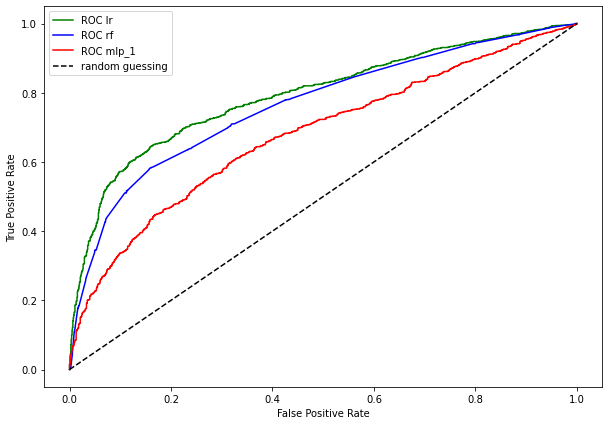

In [239]:
plt.figure(figsize=(10,7))
plt.plot(fpr1, tpr1, color='g', label='ROC lr')
plt.plot(fpr2, tpr2, color='b', label='ROC rf')
plt.plot(fpr3, tpr3, color='r', label='ROC mlp_1')
plt.plot([0,1],[0,1], ls='--', color = 'k', label = 'random guessing')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [240]:
#Compute the ROC AUC 

In [241]:
auc_1_score = \
roc_auc_score(y_true=y_test, y_score=lr_classifier.predict(X_test_std))
auc_2_score = \
roc_auc_score(y_true=y_test, y_score=rf_classifier.predict(X_test_std))
auc_3_score = \
roc_auc_score(y_true=y_test, y_score=mlp_1.predict(X_test_std))

In [242]:
print('ROC AUC score for logistic regression model: {0:.3f}'.format(auc_1_score))
print('ROC AUC score for random forest model: {0:.3f}'.format(auc_2_score))
print('ROC AUC score for neural network model: {0:.3f}'.format(auc_3_score))

ROC AUC score for logistic regression model: 0.703
ROC AUC score for random forest model: 0.700
ROC AUC score for neural network model: 0.500


In [243]:
#Based on the findings above I would select the logistic regression model. Even though it had similar
#accuracy (suitable metrci for these data as discussed above)with the random forest model it's 
#precision and and recall scores were better. 
#In addition the ROC curve of the logistic regression model was the best out of the three models. 

In [244]:
#Excersice 3 
# Explore the performance of the latter classifiers over a
# range of different parameter values

In [245]:
# Separate feature space and labels

In [246]:
x3 = marketing_data_features_converted_df.loc[:, marketing_data_features_converted_df.columns != 'y']

In [247]:
y3 = marketing_data_features_converted_df['y']

In [248]:
# Split the dataset into training and test datasets

In [249]:
#Trying different regularisation parameters for logistic regression

In [250]:
x2_train, x2_test, y2_train, y2_test =\
train_test_split( x3, y3, test_size = 0.3, random_state = 0)

In [251]:
for c in [0.0001, 0.001, 0.01, 0.1, 1]:
    pipe_lr = Pipeline([('sc', StandardScaler()),\
                       ('pca', PCA(n_components=26)),\
                       ('lr', LogisticRegression(C=c, random_state=1))])
    scores_new = cross_val_score(estimator=pipe_lr, X=x2_train, y=y2_train, cv=10, n_jobs=-1)
    
    print ('C is :', c)
    print('Training accuracy is {0:2f}'.format(np.mean(scores_new)))
    
    pipe_lr.fit(x2_train, y2_train)
    print('Test accuracy is {0:2f}'.format(pipe_lr.score(x2_test, y2_test)) )

C is : 0.0001
Training accuracy is 0.707241
Test accuracy is 0.709690
C is : 0.001
Training accuracy is 0.718966
Test accuracy is 0.723764
C is : 0.01
Training accuracy is 0.725000
Test accuracy is 0.726176
C is : 0.1
Training accuracy is 0.726034
Test accuracy is 0.726176
C is : 1
Training accuracy is 0.726552
Test accuracy is 0.726176


In [252]:
#Best value for C is 1 

In [253]:
# Trying different values for the number of trees being
# used and different values for the depth for Random Forest 

In [254]:
for i in [10, 50, 100, 200]:
    for j in [10, 20, 30]:
        pipe_rf = Pipeline([('sc', StandardScaler()),\
                           ('pca', PCA(n_components=26)),\
                           ('rf', RandomForestClassifier(n_estimators = j ,max_depth=i, random_state=1))])
        scores_new2 = cross_val_score(estimator=pipe_rf, X=x2_train, y=y2_train, cv=10, n_jobs=-1)

        print ('depth is :', i, ' no of trees is :', j)
        print('Training accuracy is {0:2f}'.format(np.mean(scores_new)))

        pipe_rf.fit(x2_train, y2_train)
        print('Test accuracy is {0:2f}'.format(pipe_rf.score(x2_test, y2_test)) )

depth is : 10  no of trees is : 10
Training accuracy is 0.726552
Test accuracy is 0.707278
depth is : 10  no of trees is : 20
Training accuracy is 0.726552
Test accuracy is 0.720949
depth is : 10  no of trees is : 30
Training accuracy is 0.726552
Test accuracy is 0.717732
depth is : 50  no of trees is : 10
Training accuracy is 0.726552
Test accuracy is 0.679936
depth is : 50  no of trees is : 20
Training accuracy is 0.726552
Test accuracy is 0.688380
depth is : 50  no of trees is : 30
Training accuracy is 0.726552
Test accuracy is 0.692400
depth is : 100  no of trees is : 10
Training accuracy is 0.726552
Test accuracy is 0.677121
depth is : 100  no of trees is : 20
Training accuracy is 0.726552
Test accuracy is 0.693205
depth is : 100  no of trees is : 30
Training accuracy is 0.726552
Test accuracy is 0.692803
depth is : 200  no of trees is : 10
Training accuracy is 0.726552
Test accuracy is 0.672296
depth is : 200  no of trees is : 20
Training accuracy is 0.726552
Test accuracy is 0.6

In [255]:
#Best paramameters are depth = 10, no of trees = 10

In [256]:
# Trying different different values for the regularization
# parameter as well as different configurations for the 
# networks hidden layers for Neural Network model

In [257]:
x3_train, x3_test, y3_train, y3_test =\
train_test_split( x1, y1, test_size = 0.3, random_state = 0)

In [258]:
 mlp_2 = MLPClassifier(activation='logistic',random_state=0) 
    
#,hidden_layer_sizes=(10,10,5),\
#alpha = 1, random_state=0)

In [259]:
# make a dictionary of the parameteres we want to optimise

In [260]:
parameter_space = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],\
                   'alpha': [0.0001, 0.05]}

In [261]:
clf = GridSearchCV(estimator = mlp_2, param_grid = parameter_space, \
                   n_jobs=-1, cv =5)

In [262]:
clf.fit(x3_train,y3_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='logistic', random_state=0),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)]})

In [263]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50)}
0.510 (+/-0.001) for {'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50)}
0.510 (+/-0.001) for {'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50)}
0.510 (+/-0.001) for {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
0.506 (+/-0.016) for {'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50)}
0.502 (+/-0.019) for {'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50)}
0.510 (+/-0.001) for {'alpha': 0.05, 'hidden_layer_sizes': (100,)}
